In [206]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [207]:
# import the dataset
df = pd.read_csv('Fifa_world_cup_matches.csv')
df['possession team1'] = df['possession team1'].str[:-1]
df['possession team2'] = df['possession team2'].str[:-1]
df['possession team1'] = pd.to_numeric(df['possession team1'], errors='coerce')
df['possession team2'] = pd.to_numeric(df['possession team2'], errors='coerce')
# Conversion de la colonne 'date' en datetime
df['date'] = pd.to_datetime(df['date'], format='%d %b %Y')
df.head(5)


,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42,50,8%,0,2,2022-11-20,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72,19,9%,6,2,2022-11-21,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44,45,11%,0,2,2022-11-21,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51,39,10%,1,1,2022-11-21,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64,24,12%,1,2,2022-11-22,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [208]:
# print size of the dataset
print('Size of the dataset: ', df.shape)

Size of the dataset:  (64, 88)


Les questions: Pourquoi l'Argentine a t-elle gagné la coupe du monde ?
- Le nombre de but marqué et le ratio.  but encaissé
- possession et passes reussi : attaque vite au but ou pas
- carton -> aggressivité faute faire des fautes mène au cartons ?
- remplacement -> gestion des ressources
- frappe parler de tout dedans dehors surface cadré ou pas 
- chart agressivité but correlation nombre de carton / faute et but ex: 3 ligne chart

In [209]:
# print the columns of the dataset
print('Columns of the dataset: ', df.columns)

Columns of the dataset:  Index(['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'hour', 'category',
       'total attempts team1', 'total attempts team2', 'conceded team1',
       'conceded team2', 'goal inside the penalty area team1',
       'goal inside the penalty area team2',
       'goal outside the penalty area team1',
       'goal outside the penalty area team2', 'assists team1', 'assists team2',
       'on target attempts team1', 'on target attempts team2',
       'off target attempts team1', 'off target attempts team2',
       'attempts inside the penalty area team1',
       'attempts inside the penalty area  team2',
       'attempts outside the penalty area  team1',
       'attempts outside the penalty area  team2', 'left channel team1',
       'left channel team2', 'left inside channel team1',
       'left inside channel team2', 'central channel team1',
       'central 

In [210]:
team1_columns = df.filter(like='team1')
team2_columns = df.filter(like='team2')

# Créer un DataFrame avec les colonnes pertinentes pour team1
team1_columns = df[['team1', 'number of goals team1','number of goals team2','possession team1', 'passes team1', 'passes completed team1', 'yellow cards team1','fouls against team2' ]]
# Créer un DataFrame avec les colonnes pertinentes pour team2
team2_columns = df[['team2', 'number of goals team1' ,'number of goals team2', 'possession team2', 'passes team2', 'passes completed team2', 'yellow cards team2', 'fouls against team1']]
# compte le nombre d'apparition de chaque équipe dans team1_columns et team2_columns et additionne les deux
match_played = team1_columns['team1'].value_counts() + team2_columns['team2'].value_counts()



In [211]:
# compte le nombre d'apparition de chaque équipe dans team1_columns et team2_columns et additionne les deux
match_played = team1_columns['team1'].value_counts() + team2_columns['team2'].value_counts()

In [212]:
# Calculer la somme des buts pour chaque équipe
team1_goals = team1_columns.groupby('team1')['number of goals team1'].sum()
team2_goals = team2_columns.groupby('team2')['number of goals team2'].sum()

# Créer un nouveau DataFrame avec une seule colonne contenant le total des buts pour chaque équipe
total_goals_df = pd.concat([team1_goals, team2_goals], axis=1)
total_goals_df.columns = ['total goals team1', 'total goals team2']
total_goals_df['total goals'] = total_goals_df['total goals team1'] + total_goals_df['total goals team2']



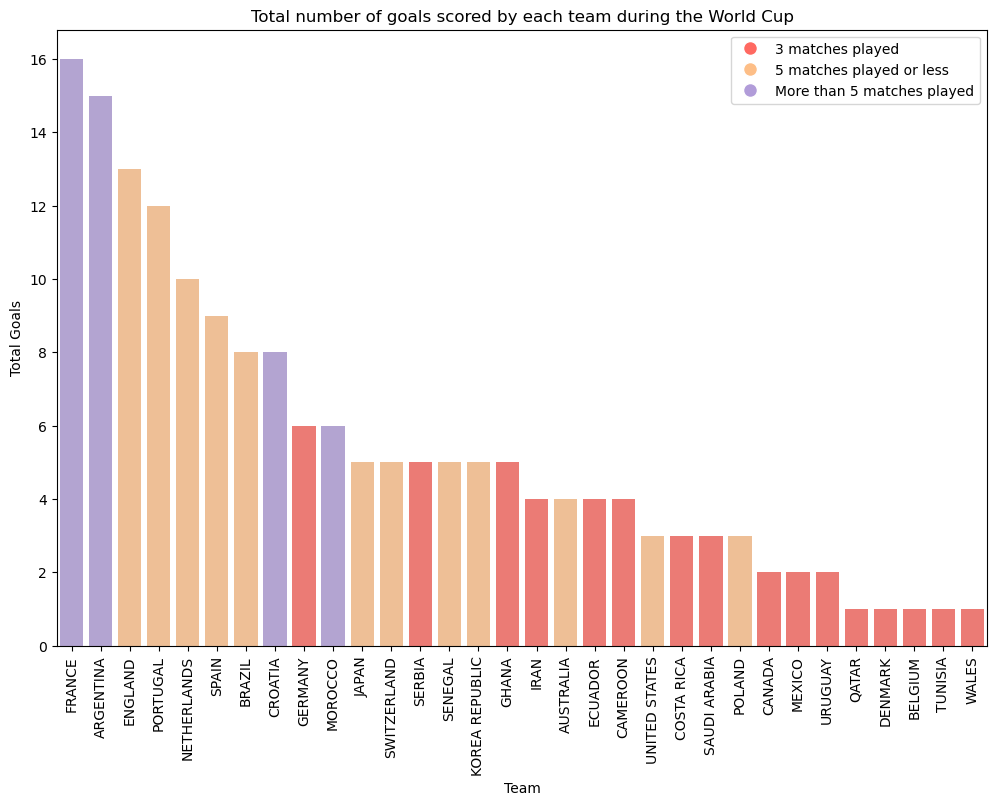

In [213]:
# Trier le DataFrame par le total des buts dans l'ordre décroissant
total_goals_match = total_goals_df.sort_values('total goals', ascending=False)

# Définir une palette de couleurs personnalisée en fonction du nombre de matchs joués
num_matches_colors = {}  # Créer un dictionnaire pour stocker les couleurs
for team in match_played.index:
    if match_played[team] == 3:
        num_matches_colors[team] = '#FF6961'  # Rouge pâle
    elif match_played[team] <= 5:
        num_matches_colors[team] = '#FDBE87'  # Jaune pâle
    else:
        num_matches_colors[team] = '#B19CD9'  # Violet pâle

# Utiliser la palette de couleurs "husl" de seaborn pour les barres
sns.set_palette("husl")

# Créer un bar chart avec couleurs personnalisées
plt.figure(figsize=(12, 8))
sns.barplot(x=total_goals_match.index, y=total_goals_match['total goals'], palette=num_matches_colors)
plt.title('Total number of goals scored by each team during the World Cup')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)

# Ajouter une légende avec des points colorés pour indiquer le nombre de matchs joués
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF6961', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FDBE87', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#B19CD9', markersize=10)
], labels=['3 matches played', '5 matches played or less', 'More than 5 matches played'])

plt.show()

On remarque que les équipes qui ont été en finales sont celles qui ont le plus marqués, on voit clairement qu'il y a un lien entre le nombre de matchs joués et le nombre de but marqués. Il est logique que les équipes qui jouent le plus soient celles qui marque le plus maqis d'un autre coté c'est aussi parce-que ces équipes ont beaucoup marquées qu'elles vont plus loin dans la compétition. 

In [214]:

# do the same but for conceded goals
team1_conceded_goals = team1_columns.groupby('team1')['number of goals team2'].sum()
team2_conceded_goals = team2_columns.groupby('team2')['number of goals team1'].sum()

# Créer un nouveau DataFrame avec une seule colonne contenant le total des buts encaissés pour chaque équipes
total_conceded_goals_df = pd.concat([team1_conceded_goals, team2_conceded_goals], axis=1)
total_conceded_goals_df.columns = ['total conceded goals team1', 'total conceded goals team2']
total_conceded_goals_df['total conceded goals'] = total_conceded_goals_df['total conceded goals team1'] + total_conceded_goals_df['total conceded goals team2']
total_conceded_goals_df

,total conceded goals team1,total conceded goals team2,total conceded goals
ARGENTINA,6,2,8
AUSTRALIA,0,6,6
BELGIUM,2,0,2
BRAZIL,1,2,3
CAMEROON,3,1,4
CANADA,2,5,7
COSTA RICA,4,7,11
CROATIA,3,4,7
DENMARK,0,3,3
ECUADOR,2,1,3


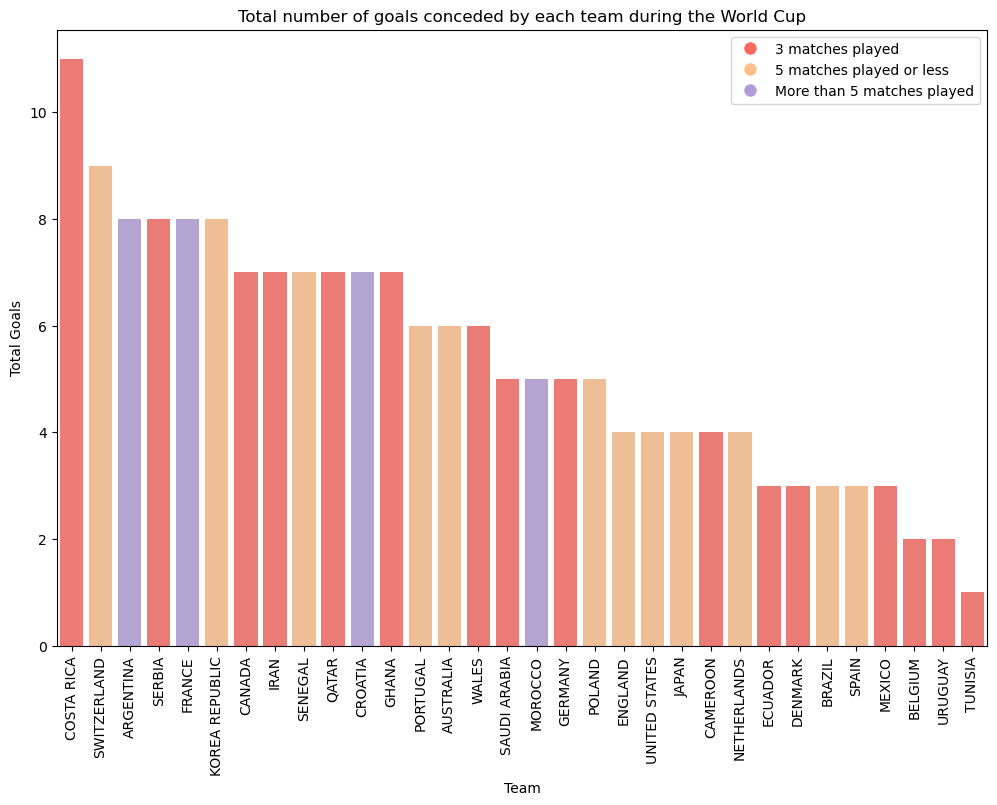

In [215]:
# Trier le DataFrame par le total des buts dans l'ordre décroissant
total_conceded_goals_match = total_conceded_goals_df.sort_values('total conceded goals', ascending=False)

# Définir une palette de couleurs personnalisée en fonction du nombre de matchs joués
num_matches_colors = {}  # Créer un dictionnaire pour stocker les couleurs
for team in match_played.index:
    if match_played[team] == 3:
        num_matches_colors[team] = '#FF6961'  # Rouge pâle
    elif match_played[team] <= 5:
        num_matches_colors[team] = '#FDBE87'  # Jaune pâle
    else:
        num_matches_colors[team] = '#B19CD9'  # Violet pâle

# Utiliser la palette de couleurs "husl" de seaborn pour les barres
sns.set_palette("husl")

# Créer un bar chart avec couleurs personnalisées
plt.figure(figsize=(12, 8))
sns.barplot(x=total_conceded_goals_match.index, y=total_conceded_goals_match['total conceded goals'], palette=num_matches_colors)
plt.title('Total number of goals conceded by each team during the World Cup')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)

# Ajouter une légende avec des points colorés pour indiquer le nombre de matchs joués
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF6961', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FDBE87', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#B19CD9', markersize=10)
], labels=['3 matches played', '5 matches played or less', 'More than 5 matches played'])

plt.show()

sur ce graphique on remarque qu'il est beaucoup plus difficile de faire un lien entre le nombre de matchs et le nombre de but encaissés, certaines équipes ont peu joué mais pris beaucoup de buts, d'autres ont beaucoup joué mais pris peu de buts. l'Argentine est la 3 eme équipe qui a encaissé le plus de but mais ils ont été en finale donc ont joués plus de match et joué des équipes plus forte donc cela est logique.

RUN CETTE PARTIE SEULEMENT POUR AFFICHER LE GRAPHE, ENSUITE IL FAUT RUN PLUS HAUT DE NOUVEAU 
ie LA PARTIE OU IL N'Y A PAS # Conversion de la colonne 'date' en datetime
df['date'] = pd.to_datetime(df['date'], format='%d %b %Y')
selected_rows = df.loc[df['date'] < '2022-12-03'])

In [216]:
# do the same thing but only for the 3 first matchs of each teams (group stage)
selected_rows = df.loc[df['date'] < '2022-12-03']
team1_group_columns2 = selected_rows.filter(like='team1')
team2_group_columns2 = selected_rows.filter(like='team2')

# Créer un DataFrame avec les colonnes pertinentes pour team1
team1_columns2 = selected_rows[['team1', 'number of goals team1','number of goals team2']]
# Créer un DataFrame avec les colonnes pertinentes pour team2
team2_columns2 = selected_rows[['team2', 'number of goals team1' ,'number of goals team2']]

# do the same but for conceded goals
team1_conceded_goals2 = team1_columns2.groupby('team1')['number of goals team2'].sum()
team2_conceded_goals2 = team2_columns2.groupby('team2')['number of goals team1'].sum()

# Créer un nouveau DataFrame avec une seule colonne contenant le total des buts encaissés pour chaque équipes
total_conceded_goals_df2 = pd.concat([team1_conceded_goals2, team2_conceded_goals2], axis=1)
total_conceded_goals_df2.columns = ['total conceded goals team1', 'total conceded goals team2']
total_conceded_goals_df2['total conceded goals'] = total_conceded_goals_df2['total conceded goals team1'] + total_conceded_goals_df2['total conceded goals team2']



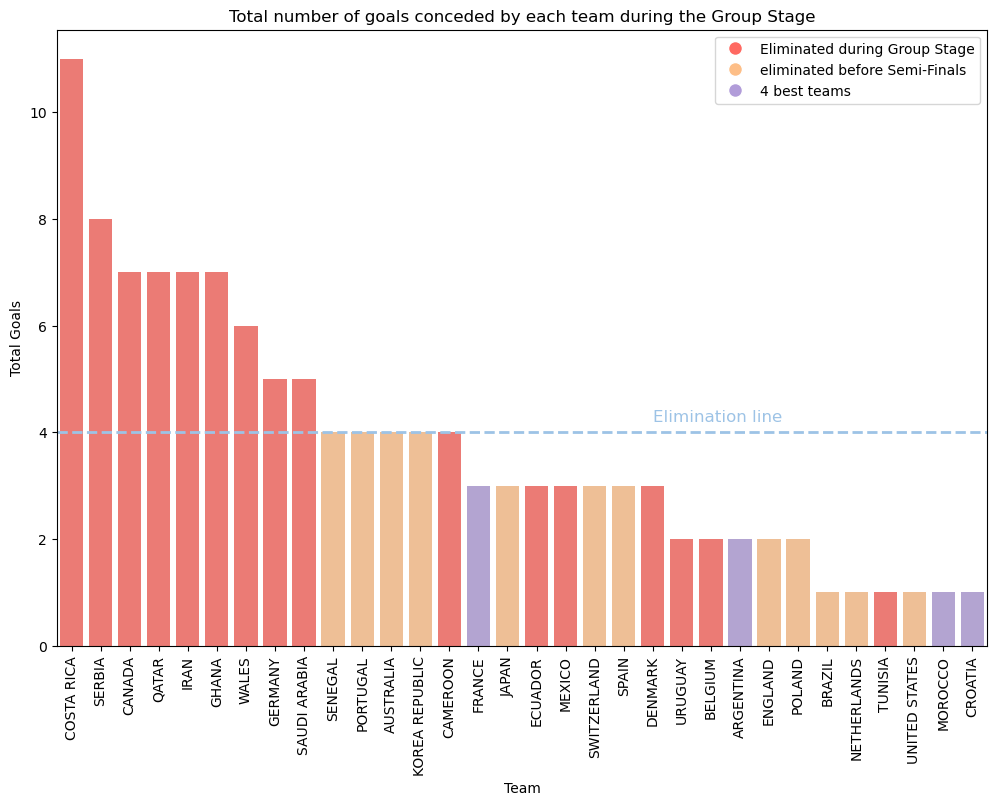

In [284]:
# Trier le DataFrame par le total des buts dans l'ordre décroissant
total_conceded_goals_match2 = total_conceded_goals_df2.sort_values('total conceded goals', ascending=False)

# Créer un bar chart avec couleurs personnalisées
plt.figure(figsize=(12, 8))
sns.barplot(x=total_conceded_goals_match2.index, y=total_conceded_goals_match2['total conceded goals'], palette=num_matches_colors)
plt.title('Total number of goals conceded by each team during the Group Stage')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)

# Ajouter une ligne horizontale à la hauteur 4 et un label
plt.axhline(y=4, color='#9DC3E6', linestyle='--', linewidth=2)
plt.text(x=20, y=4.2, s='Elimination line', fontsize=12, color='#9DC3E6')

# Ajouter une légende avec des points colorés pour indiquer le nombre de matchs joués
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF6961', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FDBE87', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#B19CD9', markersize=10)
], labels=['Eliminated during Group Stage', 'eliminated before Semi-Finals', '4 best teams'])

plt.show()

de cette manière on remarque une grande similitude entre les meilleures équipes: elles encaissent très peu de but pendant la phase de groupe. Les équipes qui ont encaissés plus de 5 buts pendant la phase de groupe ont toutes été éliminés.

In [218]:
#Les équipes qui ont le plus la possession de balle

# Calculer la possession moyenne pour chaque équipe
team1_possession = team1_columns.groupby('team1')['possession team1'].mean()
team2_possession = team2_columns.groupby('team2')['possession team2'].mean()

# Créer un nouveau DataFrame avec une seule colonne contenant le total des buts pour chaque équipe
total_possession_df = pd.concat([team1_possession, team2_possession], axis=1)
total_possession_df.columns = ['total possession team1', 'total possession team2']
total_possession_df['mean possession'] = (total_possession_df['total possession team1'] + total_possession_df['total possession team2']) / 2

/var/folders/rd/lwwsz65n4zb50801v6rj8c7r0000gn/T/ipykernel_28498/2307336575.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


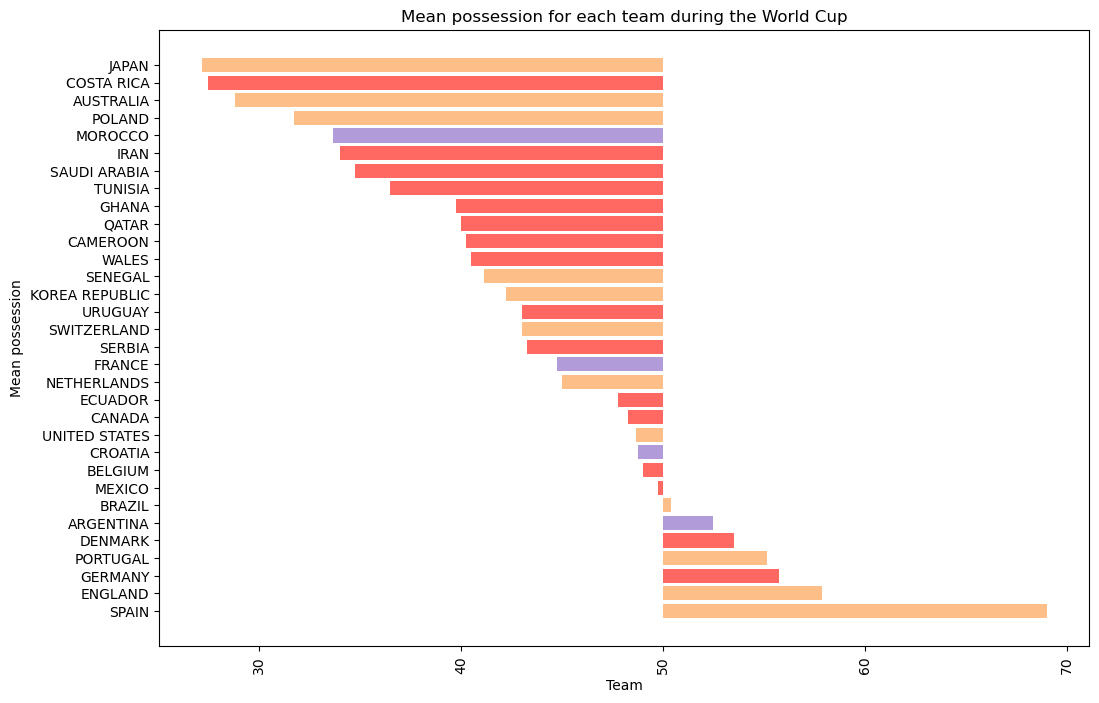

In [257]:
import matplotlib.ticker as ticker

# Trier le DataFrame par le total des buts dans l'ordre décroissant
possession_match = total_possession_df.sort_values('mean possession', ascending=False)

# Utiliser la palette de couleurs "husl" de seaborn pour les barres
sns.set_palette("husl")

# Créer une fonction pour ajouter 50 aux étiquettes de l'axe des y
def y_axis_formatter(x, pos):
    return int(x + 50)

# Utiliser la fonction pour formatter les étiquettes de l'axe des y
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(possession_match.index, possession_match['mean possession'] - 50, color=[num_matches_colors[team] for team in possession_match.index])
ax.set_title('Mean possession for each team during the World Cup')
ax.set_xlabel('Team')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('Mean possession')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(y_axis_formatter))

plt.show()


In [220]:
# do the same but for conceded goals
team1_fouls = team1_columns.groupby('team1')['fouls against team2'].sum()
team2_fouls = team2_columns.groupby('team2')['fouls against team1'].sum()

# Créer un nouveau DataFrame avec une seule colonne contenant le total des buts encaissés pour chaque équipes
total_fouls = pd.concat([team1_fouls, team2_fouls], axis=1)
total_fouls.columns = ['total fouls team1', 'total fouls team2']
total_fouls['total fouls'] = total_fouls['total fouls team1'] + total_fouls['total fouls team2']

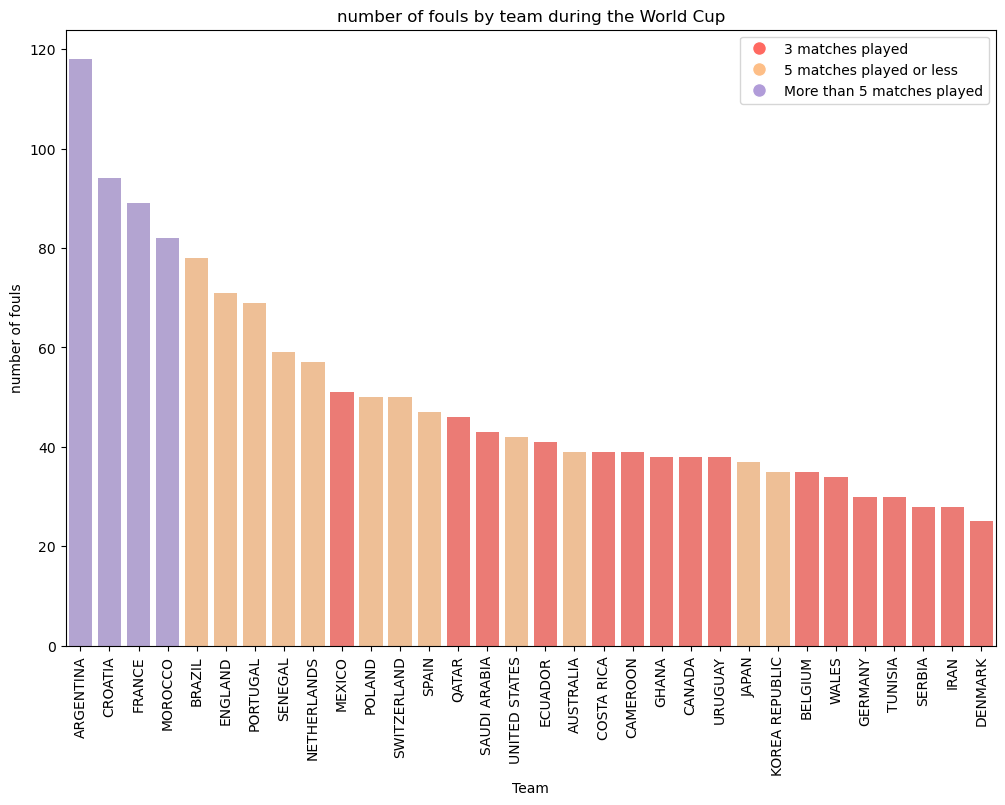

In [221]:
# Trier le DataFrame par le total des buts dans l'ordre décroissant
total_fouls_match = total_fouls.sort_values('total fouls', ascending=False)

# Définir une palette de couleurs personnalisée en fonction du nombre de matchs joués
num_matches_colors = {}  # Créer un dictionnaire pour stocker les couleurs
for team in match_played.index:
    if match_played[team] == 3:
        num_matches_colors[team] = '#FF6961'  # Rouge pâle
    elif match_played[team] <= 5:
        num_matches_colors[team] = '#FDBE87'  # Jaune pâle
    else:
        num_matches_colors[team] = '#B19CD9'  # Violet pâle

# Utiliser la palette de couleurs "husl" de seaborn pour les barres
sns.set_palette("husl")

# Créer un bar chart avec couleurs personnalisées
plt.figure(figsize=(12, 8))
sns.barplot(x=total_fouls_match.index, y=total_fouls_match['total fouls'], palette=num_matches_colors)
plt.title('number of fouls by team during the World Cup')
plt.xlabel('Team')
plt.ylabel('number of fouls')
plt.xticks(rotation=90)

# Ajouter une légende avec des points colorés pour indiquer le nombre de matchs joués
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF6961', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FDBE87', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#B19CD9', markersize=10)
], labels=['3 matches played', '5 matches played or less', 'More than 5 matches played'])

plt.show()

In [222]:
# do the same but for conceded goals
team1_yellow_cards = team1_columns.groupby('team1')['yellow cards team1'].sum()
team2_yellow_cards = team2_columns.groupby('team2')['yellow cards team2'].sum()

# Créer un nouveau DataFrame avec une seule colonne contenant le total des buts encaissés pour chaque équipes
total_yellow_cards = pd.concat([team1_yellow_cards, team2_yellow_cards], axis=1)
total_yellow_cards.columns = ['total yellow cards team1', 'total yellow cards team2']
total_yellow_cards['total yellow cards'] = total_yellow_cards['total yellow cards team1'] + total_yellow_cards['total yellow cards team2']

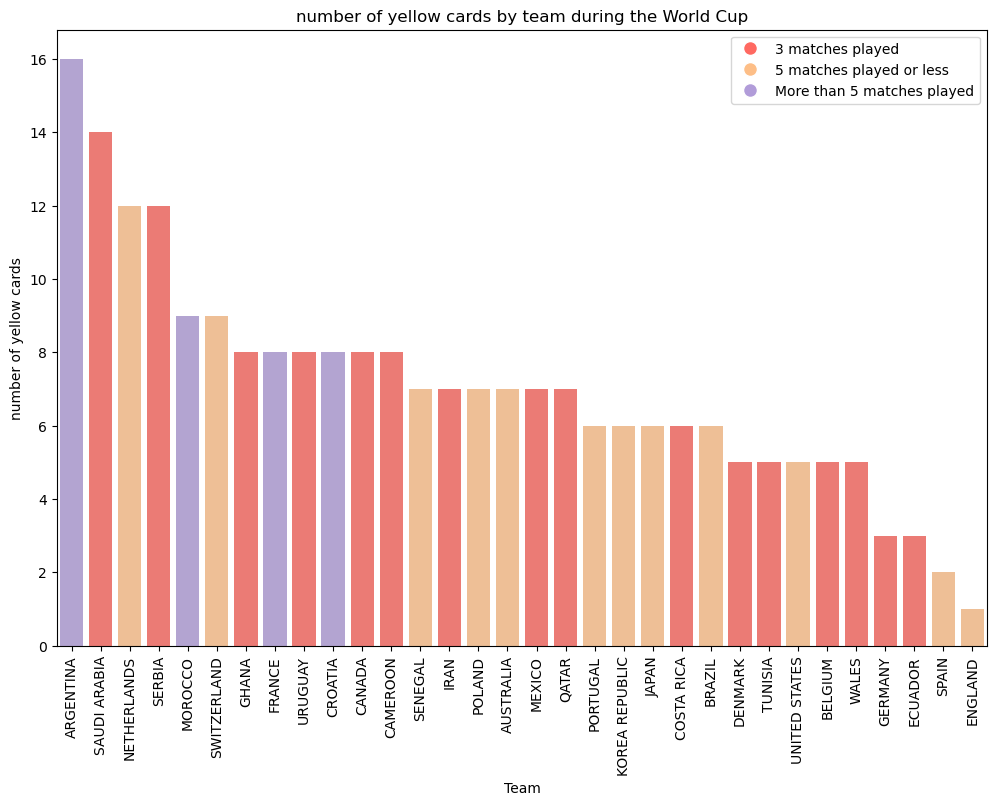

In [223]:
# Trier le DataFrame par le total des buts dans l'ordre décroissant
total_yellow_cards_match = total_yellow_cards.sort_values('total yellow cards', ascending=False)

# Définir une palette de couleurs personnalisée en fonction du nombre de matchs joués
num_matches_colors = {}  # Créer un dictionnaire pour stocker les couleurs
for team in match_played.index:
    if match_played[team] == 3:
        num_matches_colors[team] = '#FF6961'  # Rouge pâle
    elif match_played[team] <= 5:
        num_matches_colors[team] = '#FDBE87'  # Jaune pâle
    else:
        num_matches_colors[team] = '#B19CD9'  # Violet pâle

# Utiliser la palette de couleurs "husl" de seaborn pour les barres
sns.set_palette("husl")

# Créer un bar chart avec couleurs personnalisées
plt.figure(figsize=(12, 8))
sns.barplot(x=total_yellow_cards_match.index, y=total_yellow_cards_match['total yellow cards'], palette=num_matches_colors)
plt.title('number of yellow cards by team during the World Cup')
plt.xlabel('Team')
plt.ylabel('number of yellow cards')
plt.xticks(rotation=90)

# Ajouter une légende avec des points colorés pour indiquer le nombre de matchs joués
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF6961', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FDBE87', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#B19CD9', markersize=10)
], labels=['3 matches played', '5 matches played or less', 'More than 5 matches played'])

plt.show()

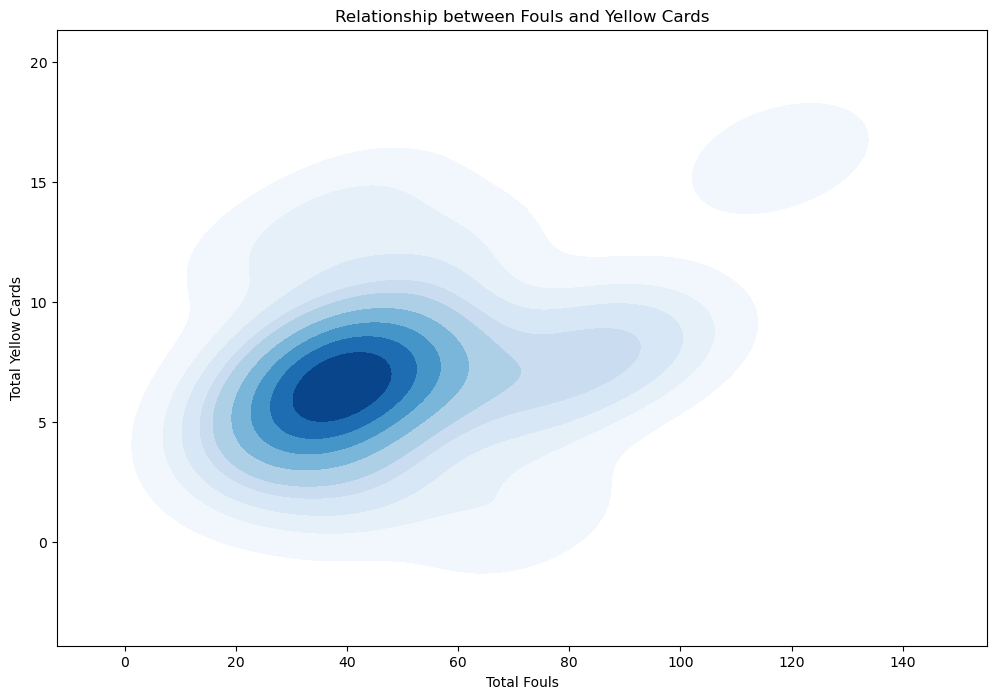

In [270]:
# Create a new DataFrame with total fouls and total yellow cards for each team
team_stats = pd.concat([total_fouls['total fouls'], total_yellow_cards['total yellow cards']], axis=1)

# Rename the columns for clarity
team_stats.columns = ['Total Fouls', 'Total Yellow Cards']

plt.figure(figsize=(12, 8))

# Plot a 2D density plot
sns.kdeplot(data=team_stats, x='Total Fouls', y='Total Yellow Cards', cmap='Blues', shade=True)

# Add labels and title
plt.xlabel('Total Fouls')
plt.ylabel('Total Yellow Cards')
plt.title('Relationship between Fouls and Yellow Cards')

# Show the plot
plt.show()





globalement plus on fait de fautes plus on prends de carton, l'argentine est l'équipe qui a pris le plus de carton et à le plus fait de faute. on peut imaginer que l'aggressivité et l'envie les ont mené a la victoire 

/Users/delaygues/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


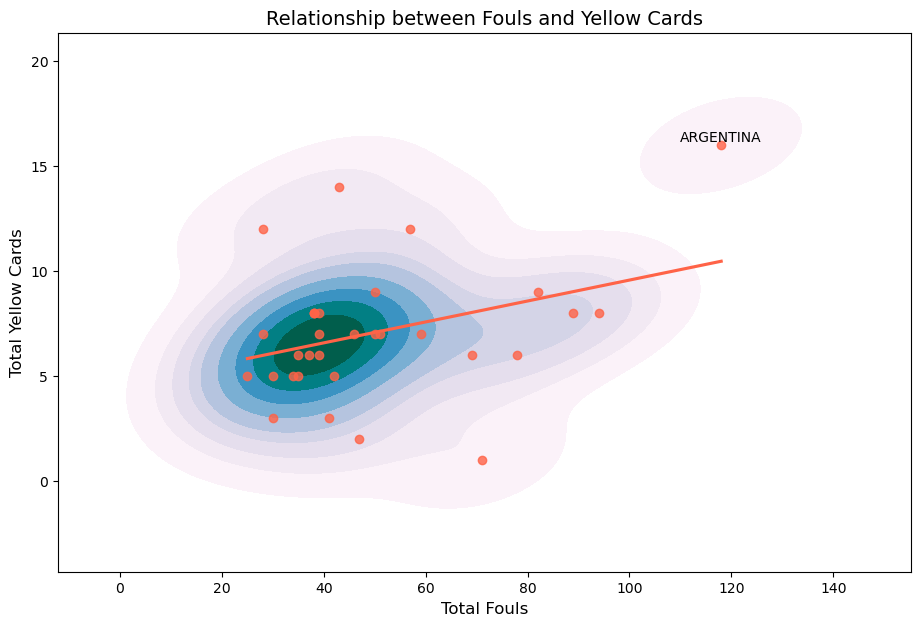

In [306]:
# Create a new DataFrame with total fouls and total yellow cards for each team
team_stats = pd.concat([total_fouls['total fouls'], total_yellow_cards['total yellow cards']], axis=1)

# Rename the columns for clarity
team_stats.columns = ['Total Fouls', 'Total Yellow Cards']

plt.figure(figsize=(11, 7))

# Plot a 2D density plot with pale colors
sns.kdeplot(data=team_stats, x='Total Fouls', y='Total Yellow Cards', cmap='PuBuGn', shade=True, shade_lowest=False)

# Add a regression line
sns.regplot(data=team_stats, x='Total Fouls', y='Total Yellow Cards', color='#FF6347', ci=None)

# Add labels and title
plt.xlabel('Total Fouls', fontsize=12)
plt.ylabel('Total Yellow Cards', fontsize=12)
plt.title('Relationship between Fouls and Yellow Cards', fontsize=14)

# Add text labels for each index near its point
for index, row in team_stats.iterrows():
    if index == 'ARGENTINA': 
        plt.text(row['Total Fouls'], row['Total Yellow Cards'], index, ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()



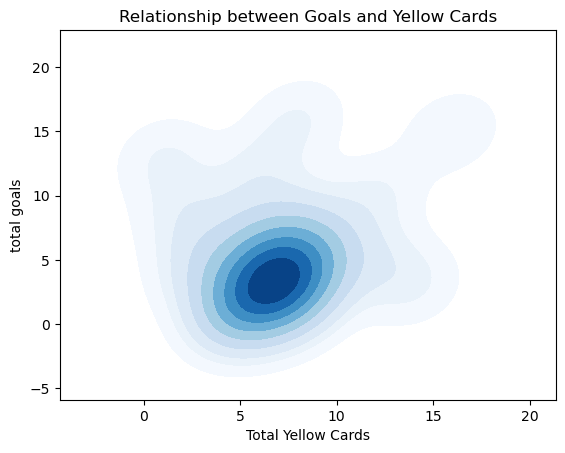

In [226]:
# Create a new DataFrame with total fouls and total yellow cards for each team
team_stats = pd.concat([total_goals_df['total goals'], total_yellow_cards['total yellow cards']], axis=1)

# Rename the columns for clarity
team_stats.columns = ['total goals', 'Total Yellow Cards']

# Plot a 2D density plot
sns.kdeplot(data=team_stats, x='Total Yellow Cards', y='total goals', cmap='Blues', shade=True)

# Add labels and title
plt.xlabel('Total Yellow Cards')
plt.ylabel('total goals')
plt.title('Relationship between Goals and Yellow Cards')

# Show the plot
plt.show()

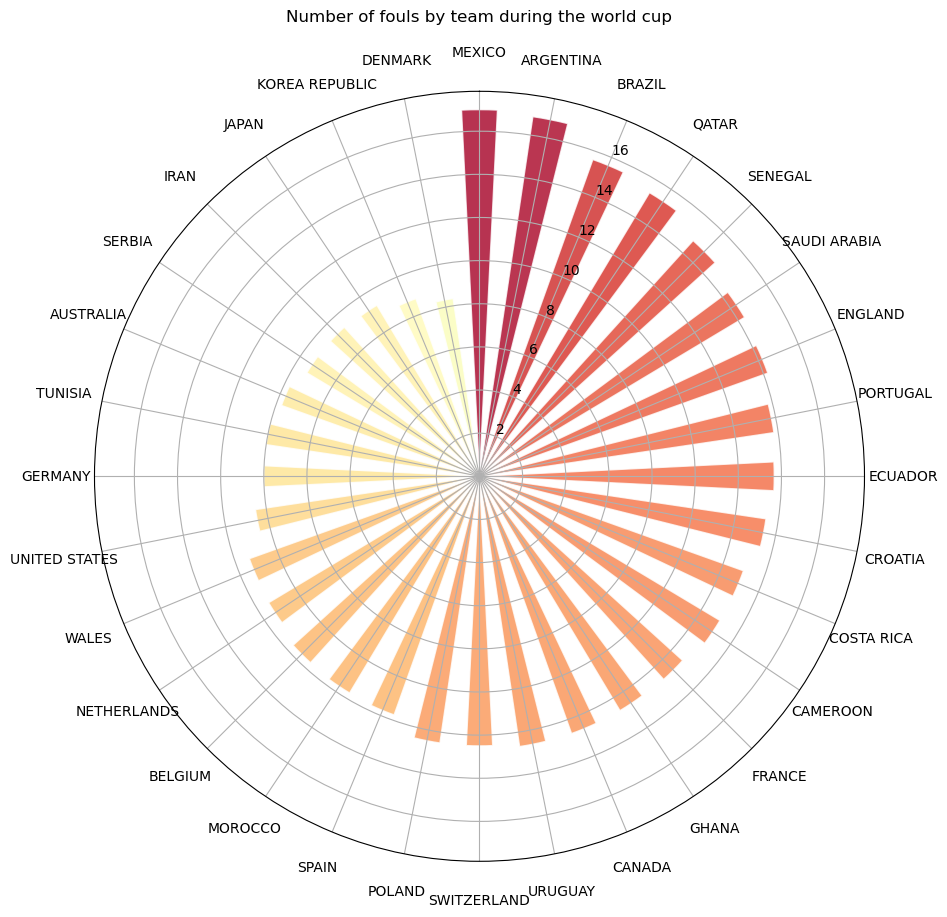

In [287]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Trier le DataFrame par le total des buts dans l'ordre décroissant
total_fouls_match = total_fouls.sort_values('total fouls', ascending=False)

# diviser le nombre de faute par le nombre de match joué par équipe
total_fouls_match['total fouls'] = total_fouls_match['total fouls'] / match_played
# Trier le DataFrame par le total des buts dans l'ordre décroissant
total_fouls_match = total_fouls_match.sort_values('total fouls', ascending=False)

# Créer une figure avec une projection polaire
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='polar')

# Définir l'angle et la largeur de chaque barre
angles = np.linspace(0, 2*np.pi, len(total_fouls_match.index), endpoint=False)
width = np.pi / len(total_fouls_match.index)

# Définir la colormap
cmap = cm.get_cmap('RdYlGn_r')

# Dessiner chaque barre avec une couleur correspondant au nombre de fautes
for i, (team, row) in enumerate(total_fouls_match.iterrows()):
    color = cmap(row['total fouls'] / total_fouls_match['total fouls'].max())
    ax.bar(x=angles[i], height=row['total fouls'], width=width, color=color, alpha=0.8, edgecolor='white')

# Définir les étiquettes de l'axe des abscisses
ax.set_xticks(angles)
ax.set_xticklabels(total_fouls_match.index,y=-0.05)

# Ajouter un titre
ax.set_title('Number of fouls by team during the world cup', y=1.08)

# Rotation de 90 degrés du graphique
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

# Afficher le graphique
plt.show()

